In [10]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
from fastai.vision.all import *



In [12]:
#read data
path = '/content/drive/MyDrive/food data'

In [13]:
def is_Healthy(x): 
    return x[0].isupper()

In [14]:
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_Healthy, item_tfms=Resize(224))

In [15]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(40)

epoch,train_loss,valid_loss,error_rate,time
0,0.987800,0.521815,0.228916,00:09


epoch,train_loss,valid_loss,error_rate,time
0,0.595331,0.422473,0.164659,00:09
1,0.485808,0.354675,0.124498,00:07
2,0.411123,0.348733,0.124498,00:09
3,0.322316,0.347797,0.120482,00:09
4,0.256380,0.367796,0.128514,00:08
5,0.199738,0.384718,0.108434,00:09
6,0.158496,0.373189,0.104418,00:07
7,0.123762,0.432603,0.108434,00:09
8,0.101928,0.434787,0.100402,00:09
9,0.081454,0.410447,0.124498,00:07


In [18]:
# Calculate accuracy on validation set
acc = accuracy(learn.get_preds()[0], learn.get_preds()[1])
acc_percentage = acc.item() * 100  # Convert tensor value to float
print(f"Accuracy on validation set: {acc_percentage:.2f}%")

Accuracy on validation set: 93.17%


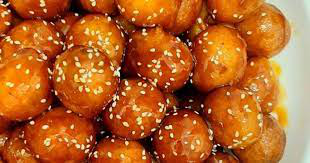

In [19]:
img = PILImage.create('/content/drive/MyDrive/food data/UnHealthy/10.jpg')
img

In [20]:
is_tench,_,probs = learn.predict('/content/drive/MyDrive/food data/UnHealthy/10.jpg')
print(f"Is this a Healthy?: {is_tench}.")
print(f"Probability it's a Healthy: {probs[1].item():.6f}")

Is this a Healthy?: False.
Probability it's a Healthy: 0.000012


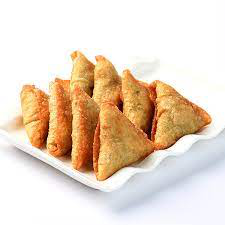

In [25]:
#testing
img = PILImage.create('/content/سمبوسه.jpeg')
img

In [27]:
#testing
is_tench,_,probs = learn.predict('/content/سمبوسه.jpeg')
print(f"Is this a Unhealthy?: {is_tench}.")
print(f"Probability it's a Unhealthy: {probs[1].item():.6f}")

Is this a Unhealthy?: True.
Probability it's a Unhealthy: 0.999991
